# Librerias Utilizadas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import Input

from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Impoorting data from drive
from google.colab import drive

# Conectar con google drive (Es necesario tener la carpeta compartida)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# MINST: Datos

In [ ]:
# Upload data
csv = ["MNISTtest_9000.csv", "MNISTtrain_40000.csv", "MNISTvalidate_11000.csv"]
carpet = "/content/drive/Shareddrives/SMLE: Guzmán-Santoscoy-Robles/data/"
MNISTtest_9000, MNISTtrain_40000, MNISTvalidate_11000 = [pd.read_csv(carpet + i) for i in csv]

def PrePross(df):
  '''
  Separa los dataframes en inputs y outputs
  '''
  input = np.array([np.array(i[1] / 255).reshape(28*28,)   for i in df.iloc[:,:-1].iterrows()])
  output = to_categorical(pd.Categorical(df.iloc[:,-1]))
  output_lab = np.array(df.iloc[:,-1]).reshape(len(df.iloc[:,-1]), 1)

  return input, output, output_lab

input_train, output_train, lab_train = PrePross(MNISTtrain_40000)
input_test, output_test, lab_test = PrePross(MNISTtest_9000)
validate = MNISTvalidate_11000

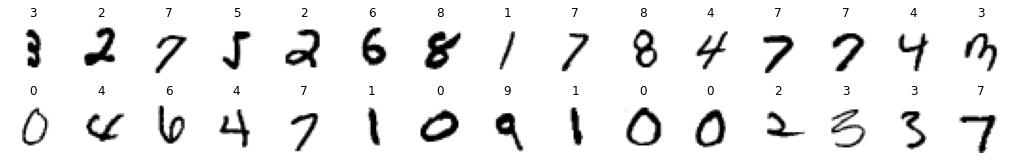

In [ ]:
n_rows = 2
n_cols = 15

class_names = [i for i in range(10)]
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(input_train[index].reshape(28,28), cmap="binary")
        plt.axis('off')
        plt.title(lab_train[index].squeeze(), fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
print(input_train.shape, output_train.shape, lab_train.shape)
print(input_test.shape, output_test.shape, lab_test.shape)

(40000, 784) (40000, 10) (40000, 1)
(9000, 784) (9000, 10) (9000, 1)


In [ ]:
# Función que grafica la matriz de confusión
import itertools

#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, ):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(5.5, 5.5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink = 0.6)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
# Funcion que te devuelve los errores
def Errores(model,y_train, y_test, lab_test , X_train, X_test):

  score = model.evaluate(y_train, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  print('Test error:', 1-score[1])
  print('\n')
  scoret = model.evaluate(X_train, X_test, verbose=0)
  print('Loss:', scoret[0])
  print('Accuracy:', scoret[1])
  print('Error:', 1 - scoret[1])
  #Classification report
  LR_pred = model.predict(y_train)
  LR_pred_c = np.argmax(LR_pred, axis=1).reshape(lab_test.shape)
  target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
  print('Classification Report')
  report = classification_report(lab_test, LR_pred_c, target_names=target_names,output_dict = False)
  print(report)
  """
  error_per_class = list()
  for k,v in report.items():
    try:
      error_per_class.append(v['precision'])
    except TypeError:
      break
  error_per_class = np.array(error_per_class)
  error_per_class = np.around(error_per_class,2)
  """
  cm = confusion_matrix(lab_test, LR_pred_c)
  plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

# MNIST: Logistic Regression

In [ ]:
LR = Sequential()
LR.add(Input(shape=784))
LR.add(Dense(units = 10, kernel_regularizer= regularizers.L1(0.001),activation="softmax"))

LR.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

LR.h = LR.fit(input_train.reshape(40000, 784), lab_train,
              epochs=30, validation_data=(input_test, lab_test))

Epoch 1/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7968 - accuracy: 0.8598 - val_loss: 0.6635 - val_accuracy: 0.8896
Epoch 2/30
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6492 - accuracy: 0.8909 - val_loss: 0.6478 - val_accuracy: 0.8940
Epoch 3/30
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6395 - accuracy: 0.8935 - val_loss: 0.6469 - val_accuracy: 0.8929
Epoch 4/30
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6355 - accuracy: 0.8946 - val_loss: 0.6432 - val_accuracy: 0.8944
Epoch 5/30
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6337 - accuracy: 0.8950 - val_loss: 0.6433 - val_accuracy: 0.8941
Epoch 6/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6327 - accuracy: 0.8964 - val_loss: 0.6411 - val_accuracy: 0.8966
Epoch 7/30
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6309 - accuracy: 0.8967 - val_loss: 0.6469 - val_accuracy:

In [ ]:
  # Errores de la regresión logística, la función Errores no funciona en este modelo
  score = LR.evaluate(input_test, lab_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  print('Test error:', 1-score[1])
  print('\n')
  scoret = LR.evaluate(input_train, lab_train, verbose=0)
  print('Loss:', scoret[0])
  print('Accuracy:', scoret[1])
  print('Error:', 1 - scoret[1])
  LR_pre = LR.predict(input_test)
  LR_pre_c = np.argmax(LR_pre, axis=1).reshape(lab_test.shape)
  target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
  print('Classification Report')
  report = classification_report(lab_test, LR_pre_c, target_names=target_names,output_dict = False)
  print(report)

Test loss: 0.6414498090744019
Test accuracy: 0.894444465637207
Test error: 0.10555553436279297


Loss: 0.6223718523979187
Accuracy: 0.8983749747276306
Error: 0.10162502527236938
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       890
           1       0.94      0.95      0.95      1019
           2       0.92      0.85      0.89       910
           3       0.90      0.83      0.86       943
           4       0.90      0.92      0.91       873
           5       0.83      0.82      0.82       805
           6       0.92      0.92      0.92       903
           7       0.90      0.92      0.91       924
           8       0.83      0.86      0.85       884
           9       0.86      0.88      0.87       849

    accuracy                           0.89      9000
   macro avg       0.89      0.89      0.89      9000
weighted avg       0.89      0.89      0.89      9000



# MINST: MLP's Models (Activation Functions)

In [ ]:
np.random.seed(1997)

## MLP_relu

In [ ]:
# Instantiate a sequential model
MLP_1 = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
MLP_1.add(Dense(100, input_shape=(28*28,), activation='relu'))
MLP_1.add(Dropout(0.2))
MLP_1.add(Dense(50, activation='relu'))
MLP_1.add(Dropout(0.2))  
MLP_1.add(Dense(25, activation='relu'))
MLP_1.add(Dropout(0.2))

# Add a dense layer with as many neurons as competitors
MLP_1.add(Dense(10, activation="softmax"))
  
# Compile your model using categorical_crossentropy loss
MLP_1.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

monitor_val_acc = EarlyStopping(monitor='val_accuracy', 
                       patience=5)
modelCheckpoint = ModelCheckpoint("MLP_1.hdf5", save_best_only = True)

model = MLP_1.fit(input_train, output_train, 
           epochs=500, validation_data=(input_test, output_test), 
          callbacks = [monitor_val_acc, modelCheckpoint])

Epoch 1/500
1250/1250 [==============================] - 5s 3ms/step - loss: 1.3783 - accuracy: 0.5255 - val_loss: 0.6095 - val_accuracy: 0.8232
Epoch 2/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7244 - accuracy: 0.7670 - val_loss: 0.3870 - val_accuracy: 0.8963
Epoch 3/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5305 - accuracy: 0.8418 - val_loss: 0.3014 - val_accuracy: 0.9159
Epoch 4/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4430 - accuracy: 0.8726 - val_loss: 0.2563 - val_accuracy: 0.9283
Epoch 5/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3860 - accuracy: 0.8903 - val_loss: 0.2310 - val_accuracy: 0.9351
Epoch 6/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3483 - accuracy: 0.9017 - val_loss: 0.2110 - val_accuracy: 0.9388
Epoch 7/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3191 - accuracy: 0.9117 - val_loss: 0.1943 - val_ac

Test loss: 0.11193912476301193
Test accuracy: 0.9698888659477234
Test error: 0.03011113405227661


Loss: 0.030121782794594765
Accuracy: 0.9915750026702881
Error: 0.008424997329711914
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       890
           1       0.98      0.99      0.98      1019
           2       0.97      0.96      0.97       910
           3       0.97      0.95      0.96       943
           4       0.97      0.98      0.98       873
           5       0.96      0.96      0.96       805
           6       0.96      0.98      0.97       903
           7       0.98      0.98      0.98       924
           8       0.96      0.95      0.96       884
           9       0.96      0.96      0.96       849

    accuracy                           0.97      9000
   macro avg       0.97      0.97      0.97      9000
weighted avg       0.97      0.97      0.97      9000



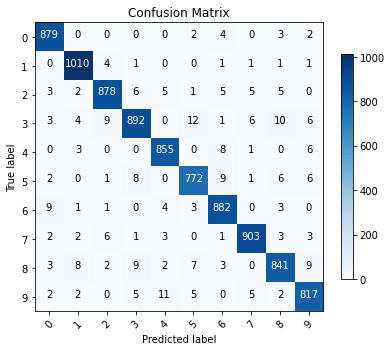

In [ ]:
Errores(MLP_1, input_test, output_test, lab_test, input_train, output_train)

## MLP_selu

In [ ]:
# Instantiate a sequential model
MLP_2 = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
MLP_2.add(Dense(100, input_shape=(28*28,), activation='selu'))
MLP_2.add(Dropout(0.2))
MLP_2.add(Dense(50, activation='selu'))
MLP_2.add(Dropout(0.2))  
MLP_2.add(Dense(25, activation='selu'))
MLP_2.add(Dropout(0.2))

# Add a dense layer with as many neurons as competitors
MLP_2.add(Dense(10, activation="softmax"))
  
# Compile your model using categorical_crossentropy loss
MLP_2.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

monitor_val_acc_2 = EarlyStopping(monitor='val_accuracy', 
                       patience=5)
modelCheckpoint_2 = ModelCheckpoint("MLP_2.hdf5", save_best_only = True)

model_2 = MLP_2.fit(input_train, output_train, 
           epochs=500, validation_data=(input_test, output_test), 
          callbacks = [monitor_val_acc_2, modelCheckpoint_2])

Epoch 1/500
1250/1250 [==============================] - 5s 3ms/step - loss: 0.7306 - accuracy: 0.7706 - val_loss: 0.3707 - val_accuracy: 0.8918
Epoch 2/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4721 - accuracy: 0.8575 - val_loss: 0.3213 - val_accuracy: 0.9068
Epoch 3/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4206 - accuracy: 0.8730 - val_loss: 0.3132 - val_accuracy: 0.9092
Epoch 4/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3923 - accuracy: 0.8824 - val_loss: 0.2946 - val_accuracy: 0.9136
Epoch 5/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3760 - accuracy: 0.8891 - val_loss: 0.2793 - val_accuracy: 0.9183
Epoch 6/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3611 - accuracy: 0.8912 - val_loss: 0.2793 - val_accuracy: 0.9180
Epoch 7/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3479 - accuracy: 0.8953 - val_loss: 0.2622 - val_ac

Test loss: 0.12111818045377731
Test accuracy: 0.964555561542511
Test error: 0.035444438457489014


Loss: 0.06813790649175644
Accuracy: 0.9790499806404114
Error: 0.020950019359588623
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       890
           1       0.99      0.98      0.98      1019
           2       0.97      0.97      0.97       910
           3       0.95      0.94      0.94       943
           4       0.96      0.98      0.97       873
           5       0.95      0.96      0.95       805
           6       0.97      0.97      0.97       903
           7       0.97      0.97      0.97       924
           8       0.95      0.95      0.95       884
           9       0.95      0.95      0.95       849

    accuracy                           0.96      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000



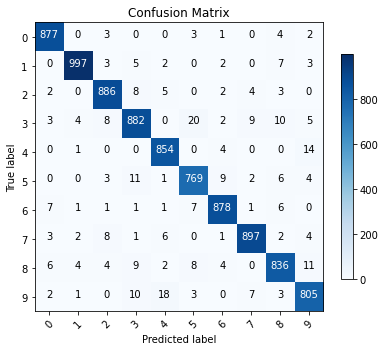

In [ ]:
Errores(MLP_2, input_test, output_test, lab_test, input_train, output_train)

## MLP_tanh

In [ ]:
# Instantiate a sequential model
MLP_3 = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
MLP_3.add(Dense(100, input_shape=(28*28,), activation='tanh'))
MLP_3.add(Dropout(0.2))
MLP_3.add(Dense(50, activation='tanh'))
MLP_3.add(Dropout(0.2))  
MLP_3.add(Dense(25, activation='tanh'))
MLP_3.add(Dropout(0.2))

# Add a dense layer with as many neurons as competitors
MLP_3.add(Dense(10, activation="softmax"))
  
# Compile your model using categorical_crossentropy loss
MLP_3.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

monitor_val_acc_3 = EarlyStopping(monitor='val_accuracy', 
                       patience=5)
modelCheckpoint_3 = ModelCheckpoint("MLP_3.hdf5", save_best_only = True)

model_3 = MLP_3.fit(input_train, output_train, 
           epochs=500, validation_data=(input_test, output_test), 
          callbacks = [monitor_val_acc_3, modelCheckpoint_3])

Epoch 1/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9890 - accuracy: 0.7203 - val_loss: 0.5055 - val_accuracy: 0.8726
Epoch 2/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5427 - accuracy: 0.8493 - val_loss: 0.3772 - val_accuracy: 0.8961
Epoch 3/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4533 - accuracy: 0.8711 - val_loss: 0.3347 - val_accuracy: 0.9053
Epoch 4/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4089 - accuracy: 0.8818 - val_loss: 0.3092 - val_accuracy: 0.9129
Epoch 5/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3804 - accuracy: 0.8901 - val_loss: 0.2915 - val_accuracy: 0.9161
Epoch 6/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3586 - accuracy: 0.8978 - val_loss: 0.2803 - val_accuracy: 0.9197
Epoch 7/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3420 - accuracy: 0.8997 - val_loss: 0.2688 - val_ac

Test loss: 0.11689687520265579
Test accuracy: 0.9674444198608398
Test error: 0.032555580139160156


Loss: 0.05892515927553177
Accuracy: 0.9819499850273132
Error: 0.018050014972686768
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       890
           1       0.98      0.99      0.99      1019
           2       0.97      0.96      0.97       910
           3       0.97      0.93      0.95       943
           4       0.96      0.98      0.97       873
           5       0.95      0.96      0.95       805
           6       0.98      0.97      0.97       903
           7       0.97      0.97      0.97       924
           8       0.95      0.96      0.95       884
           9       0.96      0.96      0.96       849

    accuracy                           0.97      9000
   macro avg       0.97      0.97      0.97      9000
weighted avg       0.97      0.97      0.97      9000



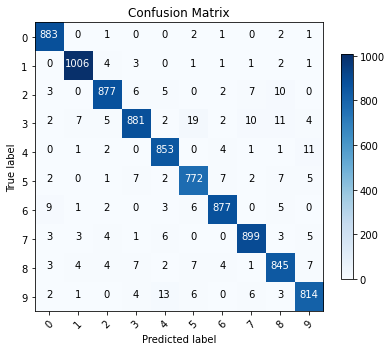

In [ ]:
Errores(MLP_3, input_test, output_test, lab_test, input_train, output_train)

## MLP_sigmoid

In [ ]:
# Instantiate a sequential model
MLP_4 = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
MLP_4.add(Dense(100, input_shape=(28*28,), activation='sigmoid'))
MLP_4.add(Dropout(0.2))
MLP_4.add(Dense(50, activation='sigmoid'))
MLP_4.add(Dropout(0.2))  
MLP_4.add(Dense(25, activation='sigmoid'))
MLP_4.add(Dropout(0.2))

# Add a dense layer with as many neurons as competitors
MLP_4.add(Dense(10, activation="softmax"))
  
# Compile your model using categorical_crossentropy loss
MLP_4.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

monitor_val_acc_4 = EarlyStopping(monitor='val_accuracy', 
                       patience=5)
modelCheckpoint_4 = ModelCheckpoint("MLP_4.hdf5", save_best_only = True)

model_4 = MLP_4.fit(input_train, output_train, 
           epochs=500, validation_data=(input_test, output_test), 
          callbacks = [monitor_val_acc_4, modelCheckpoint_4])

Epoch 1/500
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3386 - accuracy: 0.1006 - val_loss: 2.2977 - val_accuracy: 0.1132
Epoch 2/500
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3180 - accuracy: 0.1070 - val_loss: 2.2936 - val_accuracy: 0.1133
Epoch 3/500
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3069 - accuracy: 0.1129 - val_loss: 2.2888 - val_accuracy: 0.1132
Epoch 4/500
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3007 - accuracy: 0.1195 - val_loss: 2.2840 - val_accuracy: 0.1143
Epoch 5/500
1250/1250 [==============================] - 4s 3ms/step - loss: 2.2938 - accuracy: 0.1289 - val_loss: 2.2770 - val_accuracy: 0.1462
Epoch 6/500
1250/1250 [==============================] - 4s 3ms/step - loss: 2.2862 - accuracy: 0.1397 - val_loss: 2.2662 - val_accuracy: 0.2469
Epoch 7/500
1250/1250 [==============================] - 4s 3ms/step - loss: 2.2721 - accuracy: 0.1576 - val_loss: 2.2459 - val_ac

Test loss: 0.16678659617900848
Test accuracy: 0.9536666870117188
Test error: 0.04633331298828125


Loss: 0.13163405656814575
Accuracy: 0.9604750275611877
Error: 0.039524972438812256
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       890
           1       0.97      0.98      0.98      1019
           2       0.95      0.95      0.95       910
           3       0.95      0.92      0.93       943
           4       0.96      0.96      0.96       873
           5       0.93      0.94      0.93       805
           6       0.96      0.96      0.96       903
           7       0.96      0.96      0.96       924
           8       0.94      0.94      0.94       884
           9       0.93      0.94      0.93       849

    accuracy                           0.95      9000
   macro avg       0.95      0.95      0.95      9000
weighted avg       0.95      0.95      0.95      9000



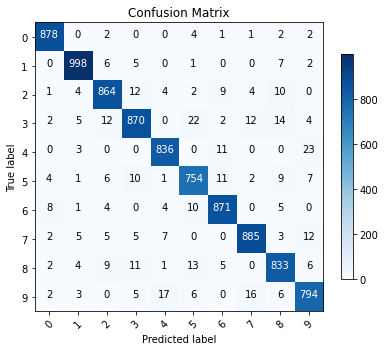

In [ ]:
Errores(MLP_4, input_test, output_test, lab_test, input_train, output_train)

## Visualization

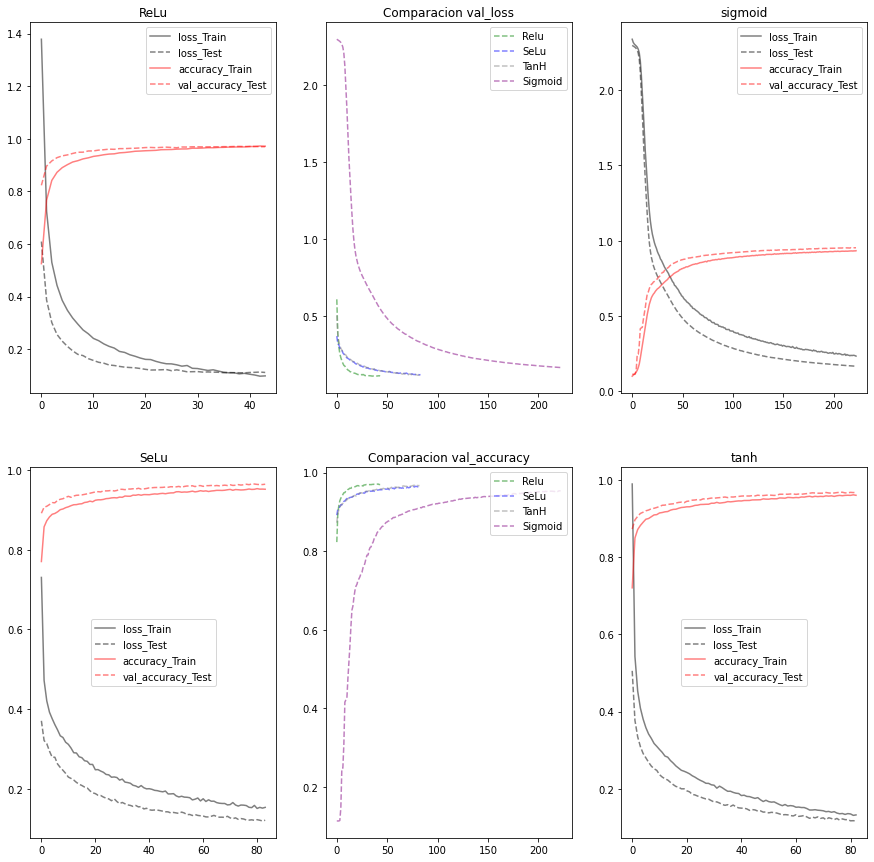

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (15,15))

## PAIRS
# 
ax[0,0].plot(model.history["loss"], color = "black", linestyle = "-", alpha = 0.5)
ax[0,0].plot(model.history["val_loss"], color = "black", linestyle = "--", alpha = 0.5)
ax[0,0].plot(model.history["accuracy"], color = "red", linestyle = "-", alpha = 0.5)
ax[0,0].plot(model.history["val_accuracy"], color = "red", linestyle = "--", alpha = 0.5)
ax[0,0].legend(['loss_Train', 'loss_Test',"accuracy_Train", "val_accuracy_Test"], loc='upper right')
ax[0,0].set_title('ReLu')

#
ax[1,0].plot(model_2.history["loss"], color = "black", linestyle = "-", alpha = 0.5)
ax[1,0].plot(model_2.history["val_loss"], color = "black", linestyle = "--", alpha = 0.5)
ax[1,0].plot(model_2.history["accuracy"], color = "red", linestyle = "-", alpha = 0.5)
ax[1,0].plot(model_2.history["val_accuracy"], color = "red", linestyle = "--", alpha = 0.5)
ax[1,0].legend(['loss_Train', 'loss_Test',"accuracy_Train", "val_accuracy_Test"], loc='center')
ax[1,0].set_title('SeLu')

#
ax[1,2].plot(model_3.history["loss"], color = "black", linestyle = "-", alpha = 0.5)
ax[1,2].plot(model_3.history["val_loss"], color = "black", linestyle = "--", alpha = 0.5)
ax[1,2].plot(model_3.history["accuracy"], color = "red", linestyle = "-", alpha = 0.5)
ax[1,2].plot(model_3.history["val_accuracy"], color = "red", linestyle = "--", alpha = 0.5)
ax[1,2].legend(['loss_Train', 'loss_Test',"accuracy_Train", "val_accuracy_Test"], loc='center')
ax[1,2].set_title('tanh')

#
ax[0,2].plot(model_4.history["loss"], color = "black", linestyle = "-", alpha = 0.5)
ax[0,2].plot(model_4.history["val_loss"], color = "black", linestyle = "--", alpha = 0.5)
ax[0,2].plot(model_4.history["accuracy"], color = "red", linestyle = "-", alpha = 0.5)
ax[0,2].plot(model_4.history["val_accuracy"], color = "red", linestyle = "--", alpha = 0.5)
ax[0,2].legend(['loss_Train', 'loss_Test',"accuracy_Train", "val_accuracy_Test"], loc='upper right')
ax[0,2].set_title('sigmoid')

## Compare
#
ax[0,1].plot(model.history["val_loss"], color = "green", linestyle = "--", alpha = 0.5)
ax[0,1].plot(model_2.history["val_loss"], color = "blue", linestyle = "--", alpha = 0.5)
ax[0,1].plot(model_3.history["val_loss"], color = "grey", linestyle = "--", alpha = 0.5)
ax[0,1].plot(model_4.history["val_loss"], color = "purple", linestyle = "--", alpha = 0.5)
ax[0,1].legend(['Relu', 'SeLu',"TanH", "Sigmoid"], loc='upper right')
ax[0,1].set_title('Comparacion val_loss')
#
ax[1,1].plot(model.history["val_accuracy"], color = "green", linestyle = "--", alpha = 0.5)
ax[1,1].plot(model_2.history["val_accuracy"], color = "blue", linestyle = "--", alpha = 0.5)
ax[1,1].plot(model_3.history["val_accuracy"], color = "grey", linestyle = "--", alpha = 0.5)
ax[1,1].plot(model_4.history["val_accuracy"], color = "purple", linestyle = "--", alpha = 0.5)
ax[1,1].legend(['Relu', 'SeLu',"TanH", "Sigmoid"], loc='upper right')
ax[1,1].set_title('Comparacion val_accuracy')


plt.show()

# MINST: MLP's Models (Architecture)


## DNN1

In [ ]:
# Instantiate a sequential model
MLP_5 = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
MLP_5.add(Dense(200, input_shape=(28*28,), activation='relu'))
MLP_5.add(Dropout(0.4))
MLP_5.add(Dense(100, activation='relu'))
MLP_5.add(Dropout(0.4))
MLP_5.add(Dense(50, activation='relu'))
MLP_5.add(Dropout(0.4))  
# Add a dense layer with as many neurons as competitors
MLP_5.add(Dense(10, activation="softmax"))
  
# Compile your model using categorical_crossentropy loss
MLP_5.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

monitor_val_acc_0 = EarlyStopping(monitor='val_accuracy', 
                       patience=5)
modelCheckpoint_0 = ModelCheckpoint("MLP_5.hdf5", save_best_only = True)

model_5 = MLP_5.fit(input_train, output_train, 
           epochs=500, validation_data=(input_test, output_test), 
          callbacks = [monitor_val_acc_0, modelCheckpoint_0])

Epoch 1/500
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5531 - accuracy: 0.4631 - val_loss: 0.5712 - val_accuracy: 0.8551
Epoch 2/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7777 - accuracy: 0.7531 - val_loss: 0.3643 - val_accuracy: 0.8959
Epoch 3/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5859 - accuracy: 0.8235 - val_loss: 0.3049 - val_accuracy: 0.9093
Epoch 4/500
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4898 - accuracy: 0.8572 - val_loss: 0.2636 - val_accuracy: 0.9237
Epoch 5/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4230 - accuracy: 0.8780 - val_loss: 0.2360 - val_accuracy: 0.9332
Epoch 6/500
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3900 - accuracy: 0.8901 - val_loss: 0.2186 - val_accuracy: 0.9378
Epoch 7/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3522 - accuracy: 0.9000 - val_loss: 0.1975 - val_ac

Test loss: 0.10746365040540695
Test accuracy: 0.9724444150924683
Test error: 0.02755558490753174


Loss: 0.02927006222307682
Accuracy: 0.9918500185012817
Error: 0.008149981498718262
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       890
           1       0.99      0.99      0.99      1019
           2       0.97      0.97      0.97       910
           3       0.98      0.94      0.96       943
           4       0.98      0.98      0.98       873
           5       0.95      0.98      0.96       805
           6       0.98      0.98      0.98       903
           7       0.98      0.98      0.98       924
           8       0.95      0.96      0.96       884
           9       0.96      0.96      0.96       849

    accuracy                           0.97      9000
   macro avg       0.97      0.97      0.97      9000
weighted avg       0.97      0.97      0.97      9000



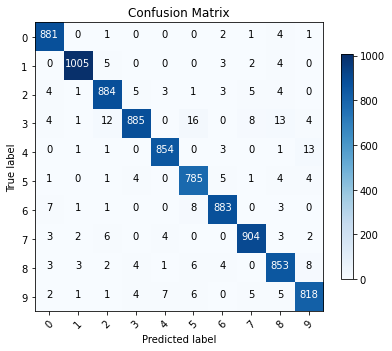

In [ ]:
Errores(MLP_5, input_test, output_test, lab_test, input_train, output_train)

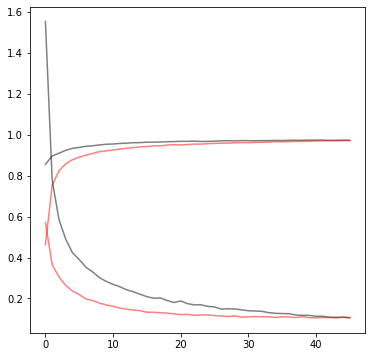

In [ ]:
fig, ax = plt.subplots( figsize = (6,6))

plt.plot(model_5.history["val_accuracy"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_5.history["accuracy"], color = "red", linestyle = "-", alpha = 0.5)
plt.plot(model_5.history["loss"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_5.history["val_loss"], color = "red", linestyle = "-", alpha = 0.5)

## DNN2


In [ ]:
# Instantiate a sequential model
MLP_6 = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
MLP_6.add(Dense(200, input_shape=(28*28,), activation='relu'))
MLP_6.add(Dropout(0.4))
MLP_6.add(Dense(40, activation='relu'))
MLP_6.add(Dropout(0.4))
MLP_6.add(Dense(40, activation='selu'))
MLP_6.add(Dropout(0.4))
MLP_6.add(Dense(40, activation='tanh'))
MLP_6.add(Dropout(0.4))  
# Add a dense layer with as many neurons as competitors
MLP_6.add(Dense(10, activation="softmax"))
  
# Compile your model using categorical_crossentropy loss
MLP_6.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy'])

monitor_val_acc_0 = EarlyStopping(monitor='val_accuracy', 
                       patience=5)
modelCheckpoint_0 = ModelCheckpoint("MLP_6.hdf5", save_best_only = True)

model_6 = MLP_6.fit(input_train, output_train, 
           epochs=500, validation_data=(input_test, output_test), 
          callbacks = [monitor_val_acc_0, modelCheckpoint_0])

Epoch 1/500
1250/1250 [==============================] - 5s 3ms/step - loss: 1.5809 - accuracy: 0.4372 - val_loss: 0.6515 - val_accuracy: 0.8416
Epoch 2/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9220 - accuracy: 0.6885 - val_loss: 0.4036 - val_accuracy: 0.8973
Epoch 3/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6868 - accuracy: 0.7844 - val_loss: 0.3035 - val_accuracy: 0.9191
Epoch 4/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5712 - accuracy: 0.8282 - val_loss: 0.2682 - val_accuracy: 0.9289
Epoch 5/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4888 - accuracy: 0.8566 - val_loss: 0.2360 - val_accuracy: 0.9368
Epoch 6/500
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4391 - accuracy: 0.8747 - val_loss: 0.2145 - val_accuracy: 0.9421
Epoch 7/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4028 - accuracy: 0.8873 - val_loss: 0.1983 - val_ac

Test loss: 0.14314694702625275
Test accuracy: 0.9655555486679077
Test error: 0.034444451332092285


Loss: 0.07329469919204712
Accuracy: 0.9816750288009644
Error: 0.018324971199035645
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       890
           1       0.98      0.98      0.98      1019
           2       0.97      0.97      0.97       910
           3       0.98      0.92      0.95       943
           4       0.97      0.98      0.97       873
           5       0.95      0.96      0.96       805
           6       0.98      0.96      0.97       903
           7       0.96      0.98      0.97       924
           8       0.95      0.95      0.95       884
           9       0.93      0.97      0.95       849

    accuracy                           0.97      9000
   macro avg       0.97      0.97      0.97      9000
weighted avg       0.97      0.97      0.97      9000



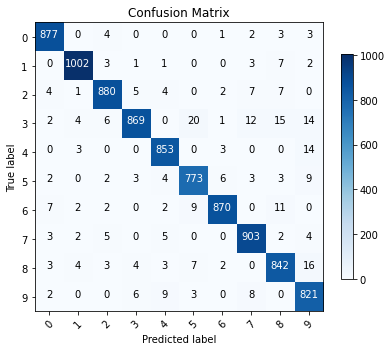

In [ ]:
Errores(MLP_6, input_test, output_test, lab_test, input_train, output_train)

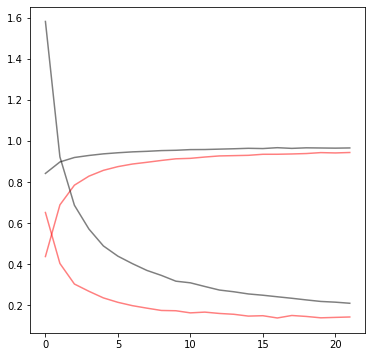

In [ ]:
fig, ax = plt.subplots( figsize = (6,6))

plt.plot(model_6.history["val_accuracy"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_6.history["accuracy"], color = "red", linestyle = "-", alpha = 0.5)
plt.plot(model_6.history["loss"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_6.history["val_loss"], color = "red", linestyle = "-", alpha = 0.5)

## DNN3


In [ ]:
# Instantiate a sequential model
MLP_7 = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
MLP_7.add(Dense(120, input_shape=(28*28,), activation='relu'))
MLP_7.add(Dropout(0.45))
MLP_7.add(Dense(50, activation='selu'))
MLP_7.add(Dropout(0.35))
MLP_7.add(Dense(50, activation='relu'))
MLP_7.add(Dropout(0.25)) 
# Add a dense layer with as many neurons as competitors
MLP_7.add(Dense(10, activation="softmax"))
  
# Compile your model using categorical_crossentropy loss
MLP_7.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

monitor_val_acc_0 = EarlyStopping(monitor='val_accuracy', 
                       patience=5)
modelCheckpoint_0 = ModelCheckpoint("MLP_7.hdf5", save_best_only = True)

model_7 = MLP_7.fit(input_train, output_train, 
           epochs=500, validation_data=(input_test, output_test), 
          callbacks = [monitor_val_acc_0, modelCheckpoint_0])

Epoch 1/500
1250/1250 [==============================] - 5s 3ms/step - loss: 0.6538 - accuracy: 0.7934 - val_loss: 0.2265 - val_accuracy: 0.9347
Epoch 2/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3339 - accuracy: 0.9044 - val_loss: 0.1898 - val_accuracy: 0.9477
Epoch 3/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2843 - accuracy: 0.9205 - val_loss: 0.1670 - val_accuracy: 0.9522
Epoch 4/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2530 - accuracy: 0.9283 - val_loss: 0.1469 - val_accuracy: 0.9607
Epoch 5/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2279 - accuracy: 0.9348 - val_loss: 0.1488 - val_accuracy: 0.9584
Epoch 6/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2152 - accuracy: 0.9393 - val_loss: 0.1398 - val_accuracy: 0.9598
Epoch 7/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2038 - accuracy: 0.9420 - val_loss: 0.1401 - val_ac

Test loss: 0.12148468941450119
Test accuracy: 0.9704444408416748
Test error: 0.029555559158325195


Loss: 0.03203707933425903
Accuracy: 0.9901999831199646
Error: 0.0098000168800354
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       890
           1       0.99      0.99      0.99      1019
           2       0.96      0.96      0.96       910
           3       0.97      0.95      0.96       943
           4       0.97      0.98      0.98       873
           5       0.96      0.97      0.97       805
           6       0.98      0.97      0.98       903
           7       0.97      0.98      0.97       924
           8       0.97      0.95      0.96       884
           9       0.96      0.96      0.96       849

    accuracy                           0.97      9000
   macro avg       0.97      0.97      0.97      9000
weighted avg       0.97      0.97      0.97      9000



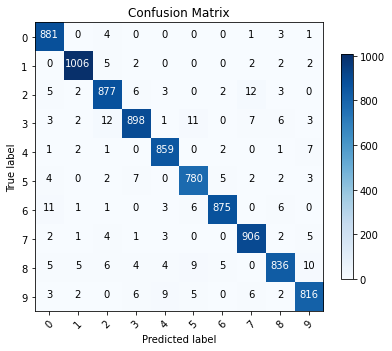

In [ ]:
Errores(MLP_7, input_test, output_test, lab_test, input_train, output_train)

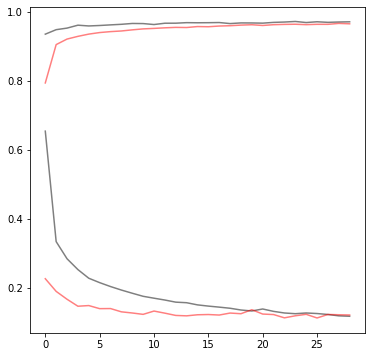

In [ ]:
fig, ax = plt.subplots( figsize = (6,6))

plt.plot(model_7.history["val_accuracy"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_7.history["accuracy"], color = "red", linestyle = "-", alpha = 0.5)
plt.plot(model_7.history["loss"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_7.history["val_loss"], color = "red", linestyle = "-", alpha = 0.5)

## DNN4


In [ ]:
# Instantiate a sequential model
MLP_8 = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
MLP_8.add(Dense(180, input_shape=(28*28,), activation='relu'))
MLP_8.add(Dropout(0.45))
MLP_8.add(Dense(60, activation='tanh'))
MLP_8.add(Dropout(0.35))
MLP_8.add(Dense(60, activation='relu'))
MLP_8.add(Dropout(0.25)) 
# Add a dense layer with as many neurons as competitors
MLP_8.add(Dense(10, activation="softmax"))
  
# Compile your model using categorical_crossentropy loss
MLP_8.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

monitor_val_acc_0 = EarlyStopping(monitor='val_accuracy', 
                       patience=5)
modelCheckpoint_0 = ModelCheckpoint("MLP_8.hdf5", save_best_only = True)

model_8 = MLP_8.fit(input_train, output_train, 
           epochs=500, validation_data=(input_test, output_test), 
          callbacks = [monitor_val_acc_0, modelCheckpoint_0])

Epoch 1/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5457 - accuracy: 0.8331 - val_loss: 0.1926 - val_accuracy: 0.9438
Epoch 2/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2781 - accuracy: 0.9197 - val_loss: 0.1592 - val_accuracy: 0.9541
Epoch 3/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2293 - accuracy: 0.9353 - val_loss: 0.1528 - val_accuracy: 0.9557
Epoch 4/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1987 - accuracy: 0.9435 - val_loss: 0.1265 - val_accuracy: 0.9648
Epoch 5/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1844 - accuracy: 0.9486 - val_loss: 0.1254 - val_accuracy: 0.9652
Epoch 6/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1653 - accuracy: 0.9529 - val_loss: 0.1199 - val_accuracy: 0.9682
Epoch 7/500
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1573 - accuracy: 0.9549 - val_loss: 0.1184 - val_ac

Test loss: 0.11326660215854645
Test accuracy: 0.9736666679382324
Test error: 0.026333332061767578


Loss: 0.030850982293486595
Accuracy: 0.9903249740600586
Error: 0.009675025939941406
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       890
           1       0.98      0.99      0.99      1019
           2       0.97      0.97      0.97       910
           3       0.97      0.95      0.96       943
           4       0.98      0.98      0.98       873
           5       0.96      0.98      0.97       805
           6       0.98      0.97      0.98       903
           7       0.97      0.98      0.98       924
           8       0.97      0.95      0.96       884
           9       0.97      0.96      0.96       849

    accuracy                           0.97      9000
   macro avg       0.97      0.97      0.97      9000
weighted avg       0.97      0.97      0.97      9000



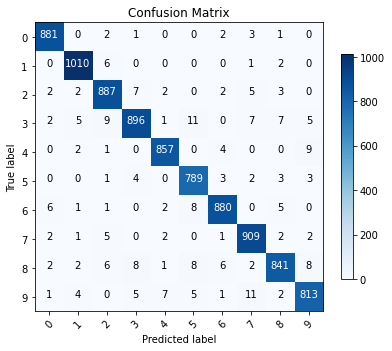

In [ ]:
Errores(MLP_8, input_test, output_test, lab_test, input_train, output_train)

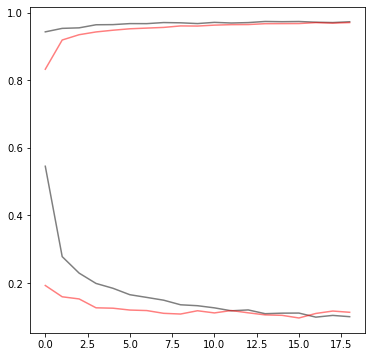

In [ ]:
fig, ax = plt.subplots( figsize = (6,6))

plt.plot(model_8.history["val_accuracy"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_8.history["accuracy"], color = "red", linestyle = "-", alpha = 0.5)
plt.plot(model_8.history["loss"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_8.history["val_loss"], color = "red", linestyle = "-", alpha = 0.5)

## DNN5


In [ ]:
# Instantiate a sequential model
MLP_9 = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
MLP_9.add(Dense(170, input_shape=(28*28,), activation='relu'))
MLP_9.add(Dropout(0.45))
MLP_9.add(Dense(40, activation='relu'))
MLP_9.add(Dropout(0.20))
MLP_9.add(Dense(40, activation='relu'))
MLP_9.add(Dropout(0.20)) 
MLP_9.add(Dense(20, activation='sigmoid'))
MLP_9.add(Dropout(0.15)) 
# Add a dense layer with as many neurons as competitors
MLP_9.add(Dense(10, activation="softmax"))
  
# Compile your model using categorical_crossentropy loss
MLP_9.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

monitor_val_acc_0 = EarlyStopping(monitor='val_accuracy', 
                       patience=5)
modelCheckpoint_0 = ModelCheckpoint("MLP_9.hdf5", save_best_only = True)

model_9 = MLP_9.fit(input_train, output_train, 
           epochs=500, validation_data=(input_test, output_test), 
          callbacks = [monitor_val_acc_0, modelCheckpoint_0])

Epoch 1/500
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9241 - accuracy: 0.7450 - val_loss: 0.3438 - val_accuracy: 0.9260
Epoch 2/500
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4196 - accuracy: 0.8991 - val_loss: 0.2350 - val_accuracy: 0.9432
Epoch 3/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3272 - accuracy: 0.9215 - val_loss: 0.1980 - val_accuracy: 0.9523
Epoch 4/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2854 - accuracy: 0.9316 - val_loss: 0.1730 - val_accuracy: 0.9587
Epoch 5/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2534 - accuracy: 0.9388 - val_loss: 0.1627 - val_accuracy: 0.9598
Epoch 6/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2332 - accuracy: 0.9427 - val_loss: 0.1563 - val_accuracy: 0.9626
Epoch 7/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2185 - accuracy: 0.9467 - val_loss: 0.1461 - val_ac

Test loss: 0.11543427407741547
Test accuracy: 0.9723333120346069
Test error: 0.027666687965393066


Loss: 0.036765262484550476
Accuracy: 0.9903500080108643
Error: 0.009649991989135742
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       890
           1       0.99      0.99      0.99      1019
           2       0.98      0.97      0.97       910
           3       0.97      0.95      0.96       943
           4       0.98      0.98      0.98       873
           5       0.95      0.97      0.96       805
           6       0.99      0.97      0.98       903
           7       0.97      0.98      0.97       924
           8       0.95      0.96      0.96       884
           9       0.97      0.96      0.96       849

    accuracy                           0.97      9000
   macro avg       0.97      0.97      0.97      9000
weighted avg       0.97      0.97      0.97      9000



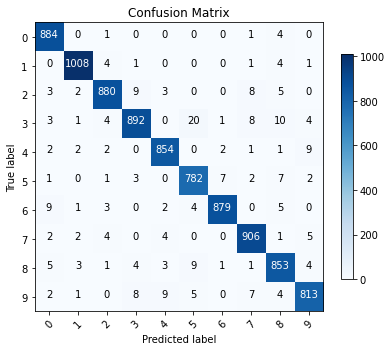

In [ ]:
Errores(MLP_9, input_test, output_test, lab_test, input_train, output_train)

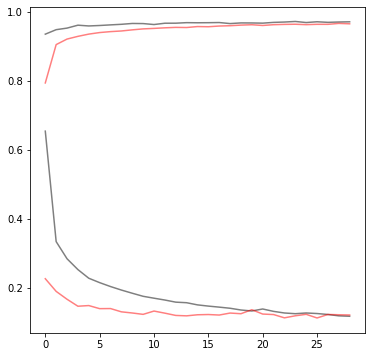

In [ ]:
fig, ax = plt.subplots( figsize = (6,6))

plt.plot(model_7.history["val_accuracy"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_7.history["accuracy"], color = "red", linestyle = "-", alpha = 0.5)
plt.plot(model_7.history["loss"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_7.history["val_loss"], color = "red", linestyle = "-", alpha = 0.5)

## DNN6


In [ ]:
# Instantiate a sequential model
MLP_10 = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
MLP_10.add(Dense(190, input_shape=(28*28,), activation='relu'))
MLP_10.add(Dropout(0.40))
MLP_10.add(Dense(60, activation='selu'))
MLP_10.add(Dropout(0.25))
MLP_10.add(Dense(30, activation='sigmoid'))
MLP_10.add(Dropout(0.20)) 

# Add a dense layer with as many neurons as competitors
MLP_10.add(Dense(10, activation="softmax"))
  
# Compile your model using categorical_crossentropy loss
MLP_10.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

monitor_val_acc_0 = EarlyStopping(monitor='val_accuracy', 
                       patience=5)
modelCheckpoint_0 = ModelCheckpoint("MLP_10.hdf5", save_best_only = True)

model_10 = MLP_10.fit(input_train, output_train, 
           epochs=500, validation_data=(input_test, output_test), 
          callbacks = [monitor_val_acc_0, modelCheckpoint_0])

Epoch 1/500
1250/1250 [==============================] - 5s 3ms/step - loss: 0.6190 - accuracy: 0.8457 - val_loss: 0.2134 - val_accuracy: 0.9443
Epoch 2/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2734 - accuracy: 0.9288 - val_loss: 0.1595 - val_accuracy: 0.9596
Epoch 3/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2181 - accuracy: 0.9428 - val_loss: 0.1417 - val_accuracy: 0.9622
Epoch 4/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1891 - accuracy: 0.9496 - val_loss: 0.1341 - val_accuracy: 0.9640
Epoch 5/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1658 - accuracy: 0.9560 - val_loss: 0.1276 - val_accuracy: 0.9658
Epoch 6/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1579 - accuracy: 0.9585 - val_loss: 0.1282 - val_accuracy: 0.9651
Epoch 7/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1419 - accuracy: 0.9624 - val_loss: 0.1176 - val_ac

Test loss: 0.09935446083545685
Test accuracy: 0.9753333330154419
Test error: 0.024666666984558105


Loss: 0.02178616262972355
Accuracy: 0.9937250018119812
Error: 0.006274998188018799
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       890
           1       0.99      0.99      0.99      1019
           2       0.98      0.97      0.98       910
           3       0.98      0.96      0.97       943
           4       0.98      0.98      0.98       873
           5       0.97      0.97      0.97       805
           6       0.98      0.99      0.98       903
           7       0.97      0.98      0.98       924
           8       0.97      0.96      0.96       884
           9       0.96      0.96      0.96       849

    accuracy                           0.98      9000
   macro avg       0.98      0.98      0.98      9000
weighted avg       0.98      0.98      0.98      9000



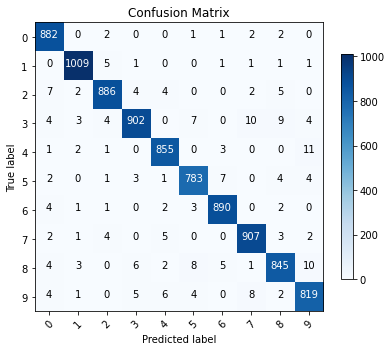

In [ ]:
Errores(MLP_10, input_test, output_test, lab_test, input_train, output_train)

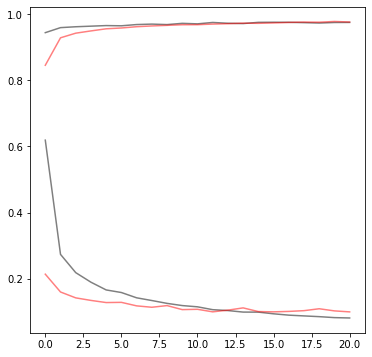

In [ ]:
fig, ax = plt.subplots( figsize = (6,6))

plt.plot(model_10.history["val_accuracy"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_10.history["accuracy"], color = "red", linestyle = "-", alpha = 0.5)
plt.plot(model_10.history["loss"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_10.history["val_loss"], color = "red", linestyle = "-", alpha = 0.5)

## DNN7


In [ ]:
# Instantiate a sequential model
MLP_11 = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
MLP_11.add(Dense(110, input_shape=(28*28,), activation='relu'))
MLP_11.add(Dropout(0.40))
MLP_11.add(Dense(55, activation='relu'))
MLP_11.add(Dropout(0.35))
# Add a dense layer with as many neurons as competitors
MLP_11.add(Dense(10, activation="softmax"))
  
# Compile your model using categorical_crossentropy loss
MLP_11.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

monitor_val_acc_0 = EarlyStopping(monitor='val_accuracy', 
                       patience=5)
modelCheckpoint_0 = ModelCheckpoint("MLP_11.hdf5", save_best_only = True)

model_11 = MLP_11.fit(input_train, output_train, 
           epochs=500, validation_data=(input_test, output_test), 
          callbacks = [monitor_val_acc_0, modelCheckpoint_0])

Epoch 1/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5719 - accuracy: 0.8240 - val_loss: 0.2252 - val_accuracy: 0.9342
Epoch 2/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2958 - accuracy: 0.9150 - val_loss: 0.1661 - val_accuracy: 0.9533
Epoch 3/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2455 - accuracy: 0.9290 - val_loss: 0.1437 - val_accuracy: 0.9594
Epoch 4/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2145 - accuracy: 0.9376 - val_loss: 0.1358 - val_accuracy: 0.9612
Epoch 5/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1941 - accuracy: 0.9427 - val_loss: 0.1297 - val_accuracy: 0.9640
Epoch 6/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1828 - accuracy: 0.9455 - val_loss: 0.1264 - val_accuracy: 0.9647
Epoch 7/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1671 - accuracy: 0.9507 - val_loss: 0.1160 - val_ac

Test loss: 0.1062769740819931
Test accuracy: 0.9702222347259521
Test error: 0.02977776527404785


Loss: 0.031658995896577835
Accuracy: 0.9901000261306763
Error: 0.00989997386932373
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       890
           1       0.99      0.99      0.99      1019
           2       0.97      0.97      0.97       910
           3       0.98      0.93      0.95       943
           4       0.98      0.98      0.98       873
           5       0.94      0.97      0.96       805
           6       0.98      0.98      0.98       903
           7       0.97      0.98      0.97       924
           8       0.97      0.95      0.96       884
           9       0.95      0.98      0.96       849

    accuracy                           0.97      9000
   macro avg       0.97      0.97      0.97      9000
weighted avg       0.97      0.97      0.97      9000



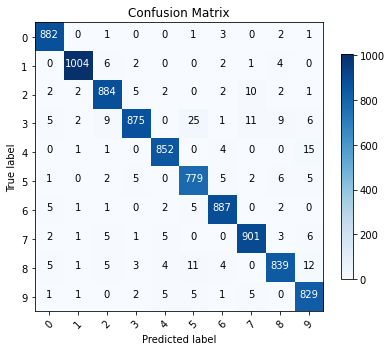

In [ ]:
Errores(MLP_11, input_test, output_test, lab_test, input_train, output_train)

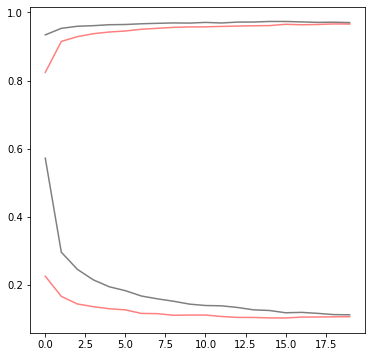

In [ ]:
fig, ax = plt.subplots( figsize = (6,6))

plt.plot(model_11.history["val_accuracy"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_11.history["accuracy"], color = "red", linestyle = "-", alpha = 0.5)
plt.plot(model_11.history["loss"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_11.history["val_loss"], color = "red", linestyle = "-", alpha = 0.5)

## DNN8


In [ ]:
# Instantiate a sequential model
MLP_12 = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
MLP_12.add(Dense(200, input_shape=(28*28,), activation='relu'))
MLP_12.add(Dropout(0.40))
MLP_12.add(Dense(100, activation='relu'))
MLP_12.add(Dropout(0.35))
MLP_12.add(Dense(50, activation='relu'))
MLP_12.add(Dropout(0.30))
MLP_12.add(Dense(25, activation='tanh'))
MLP_12.add(Dropout(0.30))
# Add a dense layer with as many neurons as competitors
MLP_12.add(Dense(10, activation="softmax"))
  
# Compile your model using categorical_crossentropy loss
MLP_12.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

monitor_val_acc_0 = EarlyStopping(monitor='val_accuracy', 
                       patience=5)
modelCheckpoint_0 = ModelCheckpoint("MLP_12.hdf5", save_best_only = True)

model_12 = MLP_12.fit(input_train, output_train, 
           epochs=500, validation_data=(input_test, output_test), 
          callbacks = [monitor_val_acc_0, modelCheckpoint_0])


Epoch 1/500
1250/1250 [==============================] - 5s 4ms/step - loss: 0.7211 - accuracy: 0.7800 - val_loss: 0.2368 - val_accuracy: 0.9373
Epoch 2/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3417 - accuracy: 0.9139 - val_loss: 0.1833 - val_accuracy: 0.9507
Epoch 3/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2771 - accuracy: 0.9308 - val_loss: 0.1676 - val_accuracy: 0.9581
Epoch 4/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2426 - accuracy: 0.9391 - val_loss: 0.1561 - val_accuracy: 0.9618
Epoch 5/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2185 - accuracy: 0.9466 - val_loss: 0.1348 - val_accuracy: 0.9657
Epoch 6/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2019 - accuracy: 0.9507 - val_loss: 0.1388 - val_accuracy: 0.9661
Epoch 7/500
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1893 - accuracy: 0.9514 - val_loss: 0.1436 - val_ac

Test loss: 0.11769692599773407
Test accuracy: 0.9729999899864197
Test error: 0.027000010013580322


Loss: 0.033182453364133835
Accuracy: 0.991474986076355
Error: 0.00852501392364502
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       890
           1       0.99      0.99      0.99      1019
           2       0.97      0.97      0.97       910
           3       0.97      0.95      0.96       943
           4       0.97      0.98      0.98       873
           5       0.96      0.98      0.97       805
           6       0.99      0.97      0.98       903
           7       0.98      0.98      0.98       924
           8       0.95      0.96      0.95       884
           9       0.97      0.96      0.96       849

    accuracy                           0.97      9000
   macro avg       0.97      0.97      0.97      9000
weighted avg       0.97      0.97      0.97      9000



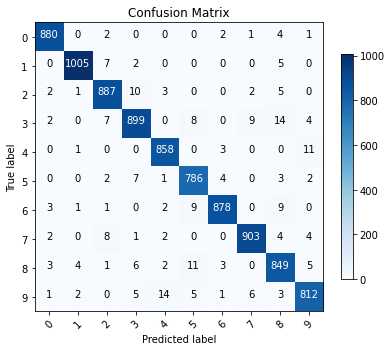

In [ ]:
Errores(MLP_12, input_test, output_test, lab_test, input_train, output_train)

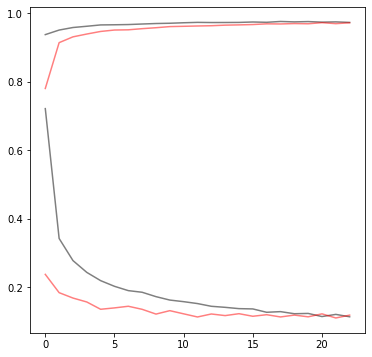

In [ ]:
fig, ax = plt.subplots( figsize = (6,6))

plt.plot(model_12.history["val_accuracy"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_12.history["accuracy"], color = "red", linestyle = "-", alpha = 0.5)
plt.plot(model_12.history["loss"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_12.history["val_loss"], color = "red", linestyle = "-", alpha = 0.5)

## ¿Que salio mal?

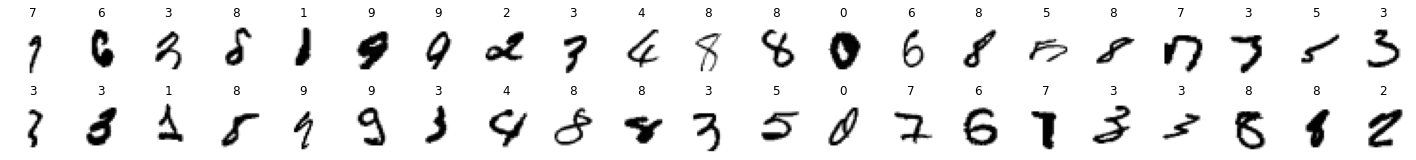

In [ ]:
pred = [i.argmax() for i in MLP_12.predict(input_test)]
compare = lab_test.squeeze() != np.array(pred)
index_error = np.where(compare)[0]
hard_prediction = [input_test[i] for i in index_error]

n_rows = 2
n_cols = 21

class_names = [i for i in range(10)]
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(hard_prediction[index].reshape(28,28), cmap="binary")
        plt.axis('off')
        plt.title(lab_test[index_error][index].squeeze(), fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# MNIST: CNN Models

## PreProcess

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Para estas arquitecturas es necesario redimensionar el train a (28, 28, 1) 
def PreProssConv(df):
  '''
  Separa los dataframes en inputs y outputs
  '''
  input = np.array([np.array(i[1] / 255).reshape(28,28)   for i in df.iloc[:,:-1].iterrows()])
  output = to_categorical(pd.Categorical(df.iloc[:,-1]))
  output_lab = np.array(df.iloc[:,-1]).reshape(len(df.iloc[:,-1]), 1)
  
  return input, output, output_lab

input_train, output_train, lab_train = PreProssConv(MNISTtrain_40000)
input_test, output_test, lab_test = PreProssConv(MNISTtest_9000)

# No correr más de una vez
input_train = np.expand_dims(input_train, -1)
input_test = np.expand_dims(input_test, -1)
print("input_train shape:", input_train.shape)
print("input_test shape:", input_test.shape)
print(input_train.shape[0], "train samples")
print('output_train shape:', output_train.shape)
print('output_test shape:', output_test.shape)
print(input_test.shape[0], "test samples")

input_train shape: (40000, 28, 28, 1)
input_test shape: (9000, 28, 28, 1)
40000 train samples
output_train shape: (40000, 10)
output_test shape: (9000, 10)
9000 test samples


## CNN_1

In [ ]:
CNN1 = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

CNN1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

monitor_val_acc_0 = EarlyStopping(monitor='val_accuracy', 
                       patience=5)
modelCheckpoint_0 = ModelCheckpoint("CNN1.hdf5", save_best_only = True)

model_13 = CNN1.fit(input_train, output_train, batch_size=128, epochs=200, validation_split=0.1
                    ,callbacks = [monitor_val_acc_0, modelCheckpoint_0])


Epoch 1/200
282/282 [==============================] - 21s 70ms/step - loss: 0.4737 - accuracy: 0.8710 - val_loss: 0.2366 - val_accuracy: 0.9312
Epoch 2/200
282/282 [==============================] - 13s 45ms/step - loss: 0.2042 - accuracy: 0.9413 - val_loss: 0.1560 - val_accuracy: 0.9575
Epoch 3/200
282/282 [==============================] - 13s 45ms/step - loss: 0.1377 - accuracy: 0.9613 - val_loss: 0.1167 - val_accuracy: 0.9682
Epoch 4/200
282/282 [==============================] - 13s 45ms/step - loss: 0.1033 - accuracy: 0.9720 - val_loss: 0.0987 - val_accuracy: 0.9728
Epoch 5/200
282/282 [==============================] - 13s 45ms/step - loss: 0.0846 - accuracy: 0.9768 - val_loss: 0.0848 - val_accuracy: 0.9760
Epoch 6/200
282/282 [==============================] - 13s 45ms/step - loss: 0.0716 - accuracy: 0.9796 - val_loss: 0.0766 - val_accuracy: 0.9770
Epoch 7/200
282/282 [==============================] - 13s 44ms/step - loss: 0.0624 - accuracy: 0.9827 - val_loss: 0.0775 - val_ac

Test loss: 0.07321193069219589
Test accuracy: 0.9807778000831604
Test error: 0.0192221999168396


Loss: 0.01568351872265339
Accuracy: 0.9968500137329102
Error: 0.0031499862670898438
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       890
           1       0.99      1.00      0.99      1019
           2       0.98      0.97      0.98       910
           3       0.98      0.97      0.98       943
           4       0.97      0.99      0.98       873
           5       0.98      0.98      0.98       805
           6       0.98      0.99      0.99       903
           7       0.98      0.98      0.98       924
           8       0.99      0.96      0.98       884
           9       0.96      0.98      0.97       849

    accuracy                           0.98      9000
   macro avg       0.98      0.98      0.98      9000
weighted avg       0.98      0.98      0.98      9000



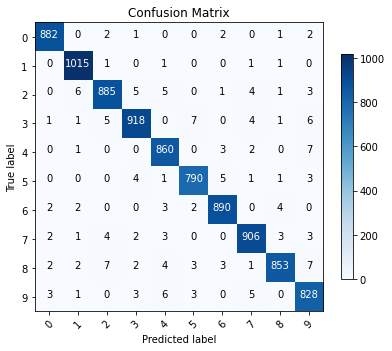

In [ ]:
Errores(CNN1, input_test, output_test, lab_test, input_train, output_train)

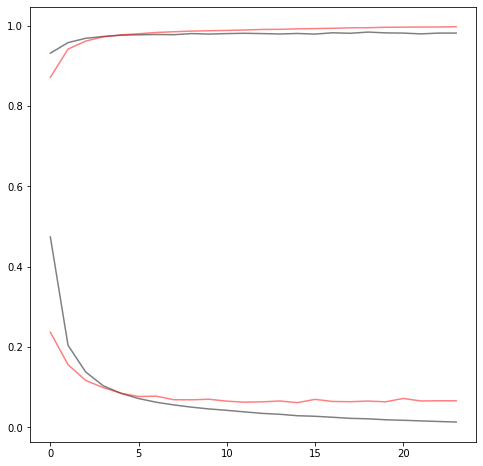

In [ ]:
model_13 = model_12
fig, ax = plt.subplots( figsize = (8,8))

plt.plot(model_13.history["val_accuracy"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_13.history["accuracy"], color = "red", linestyle = "-", alpha = 0.5)
plt.plot(model_13.history["loss"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_13.history["val_loss"], color = "red", linestyle = "-", alpha = 0.5)

In [ ]:
CNN1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


## CNN_2

In [ ]:
CNN2 = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)
CNN2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

monitor_val_acc_0 = EarlyStopping(monitor='val_accuracy', 
                       patience=4)
modelCheckpoint_0 = ModelCheckpoint("CNN2.hdf5", save_best_only = True)

model_14 = CNN2.fit(input_train, output_train, batch_size=128, epochs=200, validation_split=0.1
                    ,callbacks = [monitor_val_acc_0, modelCheckpoint_0])


Epoch 1/200
282/282 [==============================] - 21s 73ms/step - loss: 0.3835 - accuracy: 0.8909 - val_loss: 0.1670 - val_accuracy: 0.9513
Epoch 2/200
282/282 [==============================] - 20s 70ms/step - loss: 0.1367 - accuracy: 0.9615 - val_loss: 0.1064 - val_accuracy: 0.9703
Epoch 3/200
282/282 [==============================] - 21s 74ms/step - loss: 0.0938 - accuracy: 0.9735 - val_loss: 0.0867 - val_accuracy: 0.9768
Epoch 4/200
282/282 [==============================] - 22s 79ms/step - loss: 0.0726 - accuracy: 0.9792 - val_loss: 0.0748 - val_accuracy: 0.9787
Epoch 5/200
282/282 [==============================] - 20s 70ms/step - loss: 0.0610 - accuracy: 0.9829 - val_loss: 0.0657 - val_accuracy: 0.9808
Epoch 6/200
282/282 [==============================] - 20s 70ms/step - loss: 0.0521 - accuracy: 0.9849 - val_loss: 0.0724 - val_accuracy: 0.9787
Epoch 7/200
282/282 [==============================] - 20s 69ms/step - loss: 0.0463 - accuracy: 0.9866 - val_loss: 0.0651 - val_ac

Test loss: 0.07146108150482178
Test accuracy: 0.9801111221313477
Test error: 0.019888877868652344


Loss: 0.02488759532570839
Accuracy: 0.9935250282287598
Error: 0.006474971771240234
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       890
           1       0.99      0.99      0.99      1019
           2       0.96      0.98      0.97       910
           3       0.99      0.97      0.98       943
           4       0.98      0.98      0.98       873
           5       0.98      0.98      0.98       805
           6       0.99      0.98      0.98       903
           7       0.99      0.97      0.98       924
           8       0.97      0.98      0.97       884
           9       0.96      0.98      0.97       849

    accuracy                           0.98      9000
   macro avg       0.98      0.98      0.98      9000
weighted avg       0.98      0.98      0.98      9000



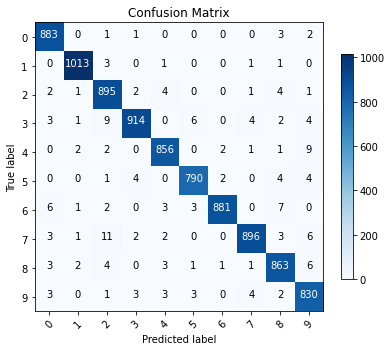

In [ ]:
Errores(CNN2, input_test, output_test, lab_test, input_train, output_train)

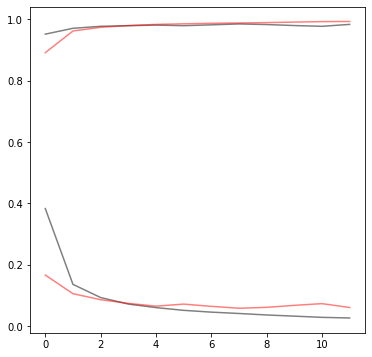

In [ ]:
fig, ax = plt.subplots( figsize = (6,6))

plt.plot(model_14.history["val_accuracy"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_14.history["accuracy"], color = "red", linestyle = "-", alpha = 0.5)
plt.plot(model_14.history["loss"], color = "black", linestyle = "-", alpha = 0.5)
plt.plot(model_14.history["val_loss"], color = "red", linestyle = "-", alpha = 0.5)

In [ ]:
CNN2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                108170    
                                                                 
Total params: 108,810
Trainable params: 108,810
Non-trainable params: 0
_________________________________________________________________


## CNN_3

In [ ]:
CNN3 = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

CNN3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

monitor_val_acc_0 = EarlyStopping(monitor='val_accuracy', 
                       patience=4)
modelCheckpoint_0 = ModelCheckpoint("CNN3.hdf5", save_best_only = True)

model_15 = CNN3.fit(input_train, output_train, batch_size=128, epochs=200, validation_split=0.1
                    ,callbacks = [monitor_val_acc_0, modelCheckpoint_0])


Epoch 1/200
282/282 [==============================] - 28s 97ms/step - loss: 0.3914 - accuracy: 0.8965 - val_loss: 0.0984 - val_accuracy: 0.9718
Epoch 2/200
282/282 [==============================] - 27s 97ms/step - loss: 0.0944 - accuracy: 0.9716 - val_loss: 0.0735 - val_accuracy: 0.9775
Epoch 3/200
282/282 [==============================] - 28s 101ms/step - loss: 0.0702 - accuracy: 0.9788 - val_loss: 0.0537 - val_accuracy: 0.9845
Epoch 4/200
282/282 [==============================] - 30s 108ms/step - loss: 0.0571 - accuracy: 0.9824 - val_loss: 0.0527 - val_accuracy: 0.9835
Epoch 5/200
282/282 [==============================] - 27s 96ms/step - loss: 0.0466 - accuracy: 0.9862 - val_loss: 0.0463 - val_accuracy: 0.9868
Epoch 6/200
282/282 [==============================] - 27s 96ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0468 - val_accuracy: 0.9858
Epoch 7/200
282/282 [==============================] - 28s 99ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.0450 - val_

Test loss: 0.054878924041986465
Test accuracy: 0.9848889112472534
Test error: 0.015111088752746582


Loss: 0.015110364183783531
Accuracy: 0.9961249828338623
Error: 0.0038750171661376953
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       890
           1       0.99      1.00      0.99      1019
           2       0.99      0.97      0.98       910
           3       0.98      0.99      0.98       943
           4       0.99      0.98      0.99       873
           5       0.99      0.97      0.98       805
           6       0.98      0.99      0.99       903
           7       0.99      0.98      0.99       924
           8       0.97      0.99      0.98       884
           9       0.97      0.98      0.98       849

    accuracy                           0.98      9000
   macro avg       0.98      0.98      0.98      9000
weighted avg       0.98      0.98      0.98      9000



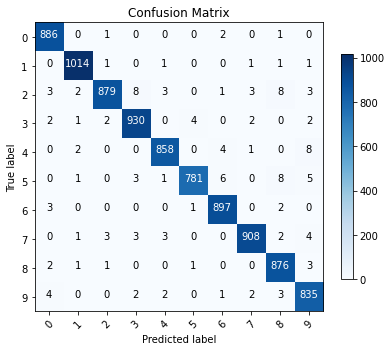

In [ ]:
Errores(CNN3, input_test, output_test, lab_test, input_train, output_train)

In [ ]:
CNN3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

## CNN_4

In [ ]:
CNN4 = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

CNN4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

monitor_val_acc_0 = EarlyStopping(monitor='val_accuracy', 
                       patience=4)
modelCheckpoint_0 = ModelCheckpoint("CNN4.hdf5", save_best_only = True)

model_16 = CNN4.fit(input_train, output_train, batch_size=128, epochs=200, validation_split=0.1
                    ,callbacks = [monitor_val_acc_0, modelCheckpoint_0])


Epoch 1/200
282/282 [==============================] - 11s 6ms/step - loss: 0.4551 - accuracy: 0.8627 - val_loss: 0.1135 - val_accuracy: 0.9660
Epoch 2/200
282/282 [==============================] - 1s 5ms/step - loss: 0.1469 - accuracy: 0.9548 - val_loss: 0.0777 - val_accuracy: 0.9762
Epoch 3/200
282/282 [==============================] - 1s 5ms/step - loss: 0.1080 - accuracy: 0.9668 - val_loss: 0.0605 - val_accuracy: 0.9818
Epoch 4/200
282/282 [==============================] - 1s 5ms/step - loss: 0.0926 - accuracy: 0.9707 - val_loss: 0.0509 - val_accuracy: 0.9845
Epoch 5/200
282/282 [==============================] - 2s 5ms/step - loss: 0.0784 - accuracy: 0.9753 - val_loss: 0.0490 - val_accuracy: 0.9852
Epoch 6/200
282/282 [==============================] - 2s 5ms/step - loss: 0.0695 - accuracy: 0.9789 - val_loss: 0.0451 - val_accuracy: 0.9862
Epoch 7/200
282/282 [==============================] - 2s 6ms/step - loss: 0.0634 - accuracy: 0.9801 - val_loss: 0.0395 - val_accuracy: 0.986

Test loss: 0.04122966155409813
Test accuracy: 0.9886666536331177
Test error: 0.011333346366882324


Loss: 0.01887262798845768
Accuracy: 0.9940750002861023
Error: 0.005924999713897705
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       890
           1       0.99      1.00      0.99      1019
           2       0.99      0.98      0.99       910
           3       1.00      0.98      0.99       943
           4       1.00      0.99      0.99       873
           5       0.99      0.99      0.99       805
           6       0.99      1.00      0.99       903
           7       0.98      0.99      0.99       924
           8       0.99      0.98      0.98       884
           9       0.97      0.99      0.98       849

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



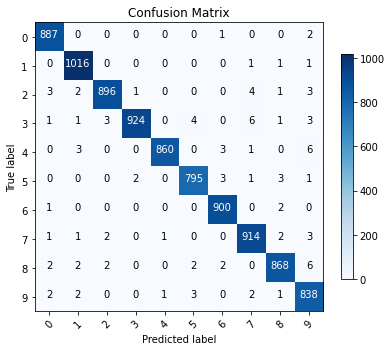

In [ ]:
Errores(CNN4, input_test, output_test, lab_test, input_train, output_train)

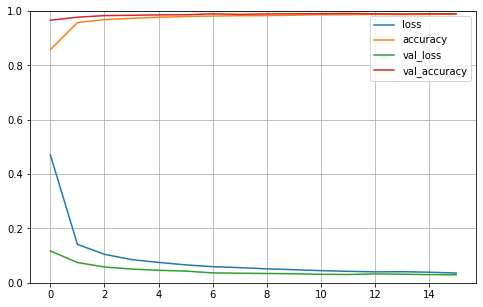

In [ ]:
pd.DataFrame(model_16.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
CNN4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

## CNN_5

In [ ]:
CNN5 = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

CNN5.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

monitor_val_acc_0 = EarlyStopping(monitor='val_accuracy', 
                       patience=4)
modelCheckpoint_0 = ModelCheckpoint("CNN5.hdf5", save_best_only = True)

model_17 = CNN5.fit(input_train, output_train, batch_size=128, epochs=200, validation_split=0.1
                    ,callbacks = [monitor_val_acc_0, modelCheckpoint_0])


Epoch 1/200
282/282 [==============================] - 15s 10ms/step - loss: 0.4009 - accuracy: 0.8696 - val_loss: 0.0793 - val_accuracy: 0.9753
Epoch 2/200
282/282 [==============================] - 2s 9ms/step - loss: 0.1056 - accuracy: 0.9679 - val_loss: 0.0564 - val_accuracy: 0.9820
Epoch 3/200
282/282 [==============================] - 2s 9ms/step - loss: 0.0770 - accuracy: 0.9763 - val_loss: 0.0419 - val_accuracy: 0.9868
Epoch 4/200
282/282 [==============================] - 2s 9ms/step - loss: 0.0622 - accuracy: 0.9803 - val_loss: 0.0356 - val_accuracy: 0.9885
Epoch 5/200
282/282 [==============================] - 2s 9ms/step - loss: 0.0536 - accuracy: 0.9832 - val_loss: 0.0302 - val_accuracy: 0.9905
Epoch 6/200
282/282 [==============================] - 3s 10ms/step - loss: 0.0453 - accuracy: 0.9859 - val_loss: 0.0311 - val_accuracy: 0.9900
Epoch 7/200
282/282 [==============================] - 3s 10ms/step - loss: 0.0427 - accuracy: 0.9861 - val_loss: 0.0315 - val_accuracy: 0.

Test loss: 0.023824159055948257
Test accuracy: 0.9927777647972107
Test error: 0.007222235202789307


Loss: 0.00848491583019495
Accuracy: 0.9976999759674072
Error: 0.0023000240325927734
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       890
           1       1.00      1.00      1.00      1019
           2       0.99      0.99      0.99       910
           3       1.00      0.99      1.00       943
           4       0.99      0.99      0.99       873
           5       1.00      0.99      0.99       805
           6       1.00      0.99      0.99       903
           7       0.99      0.99      0.99       924
           8       0.98      1.00      0.99       884
           9       0.99      0.98      0.99       849

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



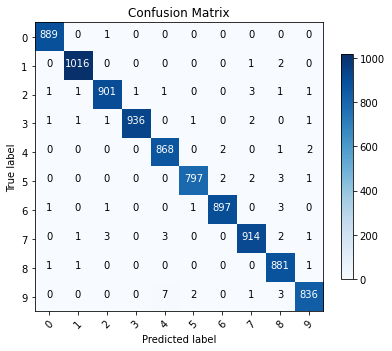

In [ ]:
Errores(CNN5, input_test, output_test, lab_test, input_train, output_train)

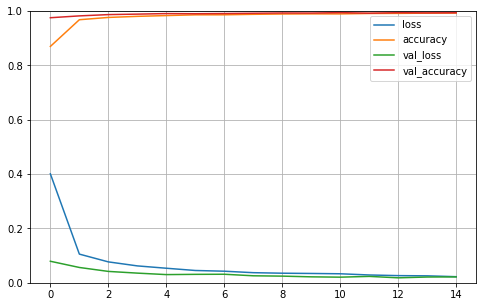

In [ ]:
pd.DataFrame(model_17.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
CNN5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

## CNN_6

In [ ]:
CNN6 = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

CNN6.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

monitor_val_acc_0 = EarlyStopping(monitor='val_accuracy', 
                       patience=4)
modelCheckpoint_0 = ModelCheckpoint("CNN6.hdf5", save_best_only = True)

model_18 = CNN6.fit(input_train, output_train, batch_size=128, epochs=200, validation_split=0.1
                    ,callbacks = [monitor_val_acc_0, modelCheckpoint_0])


Epoch 1/200
282/282 [==============================] - 81s 286ms/step - loss: 0.4277 - accuracy: 0.8599 - val_loss: 0.0766 - val_accuracy: 0.9750
Epoch 2/200
282/282 [==============================] - 87s 308ms/step - loss: 0.1092 - accuracy: 0.9666 - val_loss: 0.0545 - val_accuracy: 0.9818
Epoch 3/200
282/282 [==============================] - 107s 380ms/step - loss: 0.0786 - accuracy: 0.9759 - val_loss: 0.0391 - val_accuracy: 0.9862
Epoch 4/200
282/282 [==============================] - 81s 288ms/step - loss: 0.0589 - accuracy: 0.9818 - val_loss: 0.0295 - val_accuracy: 0.9900
Epoch 5/200
282/282 [==============================] - 81s 288ms/step - loss: 0.0500 - accuracy: 0.9849 - val_loss: 0.0297 - val_accuracy: 0.9902
Epoch 6/200
282/282 [==============================] - 84s 297ms/step - loss: 0.0440 - accuracy: 0.9864 - val_loss: 0.0358 - val_accuracy: 0.9887
Epoch 7/200
282/282 [==============================] - 81s 287ms/step - loss: 0.0418 - accuracy: 0.9869 - val_loss: 0.0266 

Test loss: 0.029610134661197662
Test accuracy: 0.991777777671814
Test error: 0.008222222328186035


Loss: 0.010726498439908028
Accuracy: 0.996649980545044
Error: 0.0033500194549560547
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       890
           1       0.99      1.00      1.00      1019
           2       0.99      0.99      0.99       910
           3       0.99      0.99      0.99       943
           4       0.99      0.99      0.99       873
           5       0.99      0.98      0.99       805
           6       0.99      1.00      0.99       903
           7       0.99      0.99      0.99       924
           8       0.99      0.99      0.99       884
           9       0.99      0.98      0.99       849

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



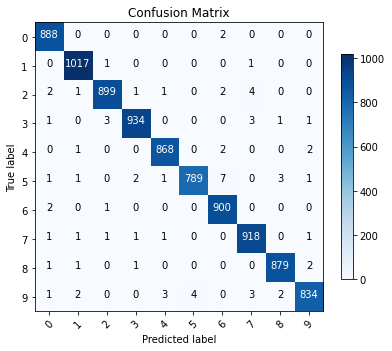

In [ ]:
Errores(CNN6, input_test, output_test, lab_test, input_train, output_train)

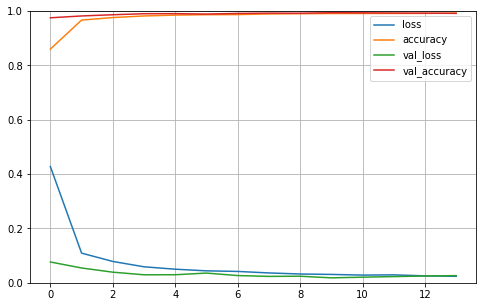

In [ ]:
pd.DataFrame(model_18.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
CNN6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

## CNN_7

In [ ]:
CNN7 = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.3),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

CNN7.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

monitor_val_acc_0 = EarlyStopping(monitor='val_accuracy', 
                       patience=4)
modelCheckpoint_0 = ModelCheckpoint("CNN7.hdf5", save_best_only = True)

model_19 = CNN7.fit(input_train, output_train, batch_size=128, epochs=200, validation_split=0.1
                    ,callbacks = [monitor_val_acc_0, modelCheckpoint_0])


Epoch 1/200
282/282 [==============================] - 35s 123ms/step - loss: 0.5180 - accuracy: 0.8311 - val_loss: 0.0866 - val_accuracy: 0.9740
Epoch 2/200
282/282 [==============================] - 36s 128ms/step - loss: 0.1420 - accuracy: 0.9580 - val_loss: 0.0560 - val_accuracy: 0.9837
Epoch 3/200
282/282 [==============================] - 35s 123ms/step - loss: 0.1047 - accuracy: 0.9690 - val_loss: 0.0383 - val_accuracy: 0.9862
Epoch 4/200
282/282 [==============================] - 36s 128ms/step - loss: 0.0870 - accuracy: 0.9741 - val_loss: 0.0368 - val_accuracy: 0.9880
Epoch 5/200
282/282 [==============================] - 37s 132ms/step - loss: 0.0731 - accuracy: 0.9783 - val_loss: 0.0318 - val_accuracy: 0.9900
Epoch 6/200
282/282 [==============================] - 35s 125ms/step - loss: 0.0644 - accuracy: 0.9801 - val_loss: 0.0311 - val_accuracy: 0.9910
Epoch 7/200
282/282 [==============================] - 35s 123ms/step - loss: 0.0566 - accuracy: 0.9830 - val_loss: 0.0276 -

Test loss: 0.03597201406955719
Test accuracy: 0.9902222156524658
Test error: 0.00977778434753418


Loss: 0.012167718261480331
Accuracy: 0.9962499737739563
Error: 0.003750026226043701
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       890
           1       0.99      1.00      1.00      1019
           2       0.99      0.99      0.99       910
           3       1.00      0.98      0.99       943
           4       0.99      0.99      0.99       873
           5       0.99      0.99      0.99       805
           6       0.99      0.99      0.99       903
           7       0.99      0.99      0.99       924
           8       0.99      0.99      0.99       884
           9       0.98      0.98      0.98       849

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000



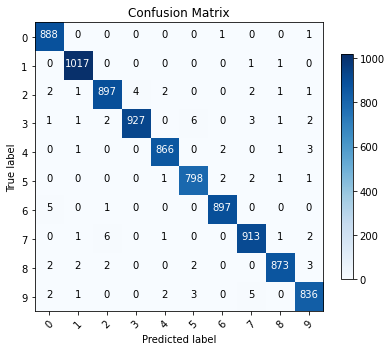

In [ ]:
Errores(CNN7, input_test, output_test, lab_test, input_train, output_train)

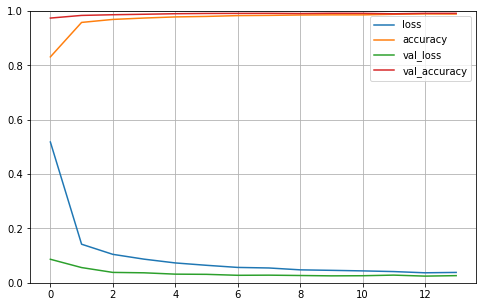

In [ ]:
pd.DataFrame(model_19.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
CNN7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 64)         

##¿Que salio mal?

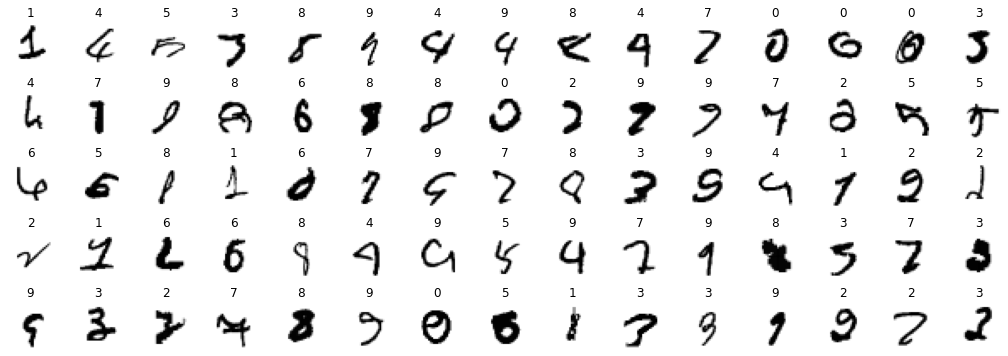

In [ ]:
pred = [i.argmax() for i in CNN5.predict(input_test)]
compare = lab_test.squeeze() != np.array(pred)
index_error = np.where(compare)[0]
hard_prediction = [input_test[i] for i in index_error]

n_rows = 5
n_cols = 15

class_names = [i for i in range(10)]
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(hard_prediction[index].reshape(28,28), cmap="binary")
        plt.axis('off')
        plt.title(lab_test[index_error][index].squeeze(), fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
len(index_error)

75

# Best Model Predictions

In [ ]:
  val_data = np.array([np.array(i[1] / 255).reshape(28*28,)   for i in validate.iterrows()])

## Logistic Regression Pred

In [ ]:
LR_pred = LR.predict(val_data.reshape(11000,784))
LR_pred = np.argmax(LR_pred, axis=1)
LR_pred = pd.DataFrame(LR_pred).transpose()
LR_pred.to_csv("/content/drive/Shareddrives/SMLE: Guzmán-Santoscoy-Robles/data/LR_pred.csv")

## MLP Pred

In [ ]:
MLP8_pred = MLP_8.predict(val_data.reshape(11000,784))
MLP8_pred = np.argmax(MLP8_pred, axis=1)
MLP8_pred = pd.DataFrame(MLP8_pred).transpose()
MLP8_pred.to_csv("/content/drive/Shareddrives/SMLE: Guzmán-Santoscoy-Robles/data/MLP8_pred.csv")


## CNN Pred

In [ ]:
CNN4_pred = CNN4.predict(val_data.reshape(11000,28,28))
CNN4_pred = np.argmax(CNN4_pred, axis=1)
CNN4_pred = pd.DataFrame(CNN4_pred).transpose()
CNN4_pred.to_csv("/content/drive/Shareddrives/SMLE: Guzmán-Santoscoy-Robles/data/CNN4_pred.csv")

CNN5_pred = CNN5.predict(val_data.reshape(11000,28,28))
CNN5_pred = np.argmax(CNN5_pred, axis=1)
CNN5_pred = pd.DataFrame(CNN5_pred).transpose()
CNN5_pred.to_csv("/content/drive/Shareddrives/SMLE: Guzmán-Santoscoy-Robles/data/CNN5_pred.csv")

CNN6_pred = CNN6.predict(val_data.reshape(11000,28,28))
CNN6_pred = np.argmax(CNN6_pred, axis=1)
CNN6_pred = pd.DataFrame(CNN6_pred).transpose()
CNN6_pred.to_csv("/content/drive/Shareddrives/SMLE: Guzmán-Santoscoy-Robles/data/CNN6_pred.csv")

CNN7_pred = CNN7.predict(val_data.reshape(11000,28,28))
CNN7_pred = np.argmax(CNN7_pred, axis=1)
CNN7_pred = pd.DataFrame(CNN7_pred).transpose()
CNN7_pred.to_csv("/content/drive/Shareddrives/SMLE: Guzmán-Santoscoy-Robles/data/CNN7_pred.csv")